In [ ]:
import tensorflow as tf

from keras import optimizers
from keras.utils import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping

from keras.applications import ResNet50, DenseNet201
from keras.applications import resnet, densenet

import numpy as np
import matplotlib.pyplot as plt

import cv2
import os
import pandas as pd

In [ ]:
train_path = "/content/drive/MyDrive/Data/train"
test_path = "/content/drive/MyDrive/Data/test"
valid_path = "/content/drive/MyDrive/Data/valid"

In [ ]:
image_shape = (305,430,3)
N_CLASSES = 4
BATCH_SIZE = 32


train_datagen = ImageDataGenerator(dtype='float32', rescale= 1./255.)
train_generator = train_datagen.flow_from_directory(train_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (305,430),
                                                   class_mode = 'categorical')

valid_datagen = ImageDataGenerator(dtype='float32', rescale= 1./255.)
valid_generator = valid_datagen.flow_from_directory(valid_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (305,430),
                                                   class_mode = 'categorical')

test_datagen = ImageDataGenerator(dtype='float32', rescale = 1.0/255.0)
test_generator = test_datagen.flow_from_directory(test_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (305,430),
                                                   class_mode = 'categorical')

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']


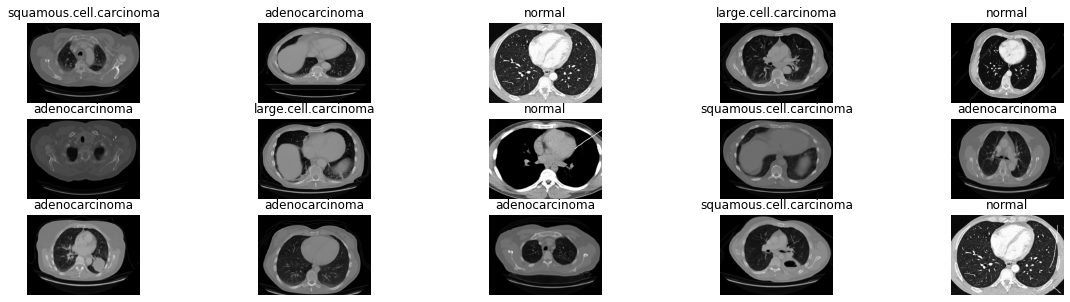

In [ ]:
class_names=list(test_generator.class_indices.keys())
print(class_names)

fig = plt.figure(figsize=(20,5))

image_batch,label_batch = test_generator[1]
for i in range(15):
    ax = fig.add_subplot(3,5,i+1,xticks = [], yticks = [])
    ax.imshow(image_batch[i])
    plt.axis('off')
    plt.title(class_names[np.argmax(label_batch[i])])

In [ ]:
first_model = Sequential([
  Conv2D(8, 2, padding='same', activation='relu', input_shape = image_shape),
  MaxPooling2D(2),
  Conv2D(16, 2, padding='same', activation='relu'),
  MaxPooling2D(2),

  Dropout(0.4),
  Flatten(),
  Dense(256, activation='relu'),
  Dropout(0.4),
  Dense(4, activation='softmax')
])
first_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 305, 430, 8)       104       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 152, 215, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 152, 215, 16)      528       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 76, 107, 16)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 76, 107, 16)       0         
                                                                 
 flatten (Flatten)           (None, 130112)            0

In [ ]:
checkpointer = ModelCheckpoint('chestmodel.hdf5',verbose=1, save_best_only= True)
early_stopping = EarlyStopping(monitor= 'val_loss', patience= 10)
optimizer = optimizers.Adam(learning_rate= 0.00001, decay= 1e-5)

first_model.compile(loss= 'categorical_crossentropy', optimizer= optimizer, metrics=['acc'])
history = first_model.fit(train_generator,
                    steps_per_epoch = 20,
                    epochs = 80,
                    verbose = 1,
                    validation_data = valid_generator,
                    callbacks = [checkpointer, early_stopping])

Epoch 1/80
20/20 [==============================] - ETA: 0s - loss: 1.3023 - acc: 0.3295 
Epoch 1: val_loss improved from inf to 1.32494, saving model to chestmodel.hdf5
20/20 [==============================] - 451s 22s/step - loss: 1.3023 - acc: 0.3295 - val_loss: 1.3249 - val_acc: 0.4167
Epoch 2/80
20/20 [==============================] - ETA: 0s - loss: 1.1998 - acc: 0.4715
Epoch 2: val_loss improved from 1.32494 to 1.27826, saving model to chestmodel.hdf5
20/20 [==============================] - 6s 313ms/step - loss: 1.1998 - acc: 0.4715 - val_loss: 1.2783 - val_acc: 0.4028
Epoch 3/80
20/20 [==============================] - ETA: 0s - loss: 1.1470 - acc: 0.4861
Epoch 3: val_loss improved from 1.27826 to 1.17631, saving model to chestmodel.hdf5
20/20 [==============================] - 6s 311ms/step - loss: 1.1470 - acc: 0.4861 - val_loss: 1.1763 - val_acc: 0.4167
Epoch 4/80
20/20 [==============================] - ETA: 0s - loss: 1.0766 - acc: 0.5237
Epoch 4: val_loss did not improv

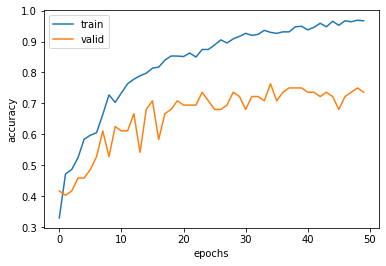

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'], label = 'train',)
plt.plot(history.history['val_acc'], label = 'valid')

plt.legend(loc = 'upper left')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [ ]:
result = first_model.evaluate(test_generator)

10/10 [==============================] - 105s 12s/step - loss: 1.2105 - acc: 0.5492


In [ ]:
image_shape = (460,460,3)
N_CLASSES = 4
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(dtype='float32', preprocessing_function=densenet.preprocess_input)
train_generator = train_datagen.flow_from_directory(train_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

valid_datagen = ImageDataGenerator(dtype='float32', preprocessing_function=densenet.preprocess_input)
valid_generator = valid_datagen.flow_from_directory(valid_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

test_datagen = ImageDataGenerator(dtype='float32', preprocessing_function=densenet.preprocess_input)
test_generator = test_datagen.flow_from_directory(test_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [ ]:
dense_model = DenseNet201(include_top=False, pooling='avg', weights='imagenet', input_shape = (image_shape))

# make all layers except conv5 layers not trainable
for layer in dense_model.layers:
    if 'conv5' not in layer.name:
        layer.trainable = False

74836368/74836368 [==============================] - 4s 0us/step


In [ ]:
densenet_model = Sequential()
densenet_model.add(dense_model)
densenet_model.add(Flatten())
densenet_model.add(BatchNormalization())
densenet_model.add(Dense(N_CLASSES, activation='softmax'))
densenet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 1920)              18321984  
                                                                 
 flatten_1 (Flatten)         (None, 1920)              0         
                                                                 
 batch_normalization (BatchN  (None, 1920)             7680      
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 4)                 7684      
                                                                 
Total params: 18,337,348
Trainable params: 6,990,084
Non-trainable params: 11,347,264
_________________________________________________________________


In [ ]:
optimizer = optimizers.Adam(learning_rate= 0.00001, decay= 1e-6)
densenet_model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics = ['acc'])

checkpointer = ModelCheckpoint(filepath='./chestmodel-DenseNet201.hdf5',
                            monitor='val_loss', verbose = 1,
                            save_best_only=True)
early_stopping = EarlyStopping(verbose=1, patience=15)

In [ ]:
history_dense = densenet_model.fit(train_generator,
                                steps_per_epoch = 20,
                                epochs = 80,
                                verbose = 1,
                                validation_data = valid_generator,
                                callbacks = [checkpointer, early_stopping])

Epoch 1/80
20/20 [==============================] - ETA: 0s - loss: 1.2889 - acc: 0.4372
Epoch 1: val_loss improved from inf to 1.18694, saving model to ./chestmodel-DenseNet201.hdf5
20/20 [==============================] - 47s 1s/step - loss: 1.2889 - acc: 0.4372 - val_loss: 1.1869 - val_acc: 0.4583
Epoch 2/80
20/20 [==============================] - ETA: 0s - loss: 0.8380 - acc: 0.6607
Epoch 2: val_loss improved from 1.18694 to 1.06358, saving model to ./chestmodel-DenseNet201.hdf5
20/20 [==============================] - 17s 828ms/step - loss: 0.8380 - acc: 0.6607 - val_loss: 1.0636 - val_acc: 0.5972
Epoch 3/80
20/20 [==============================] - ETA: 0s - loss: 0.6030 - acc: 0.8026
Epoch 3: val_loss improved from 1.06358 to 0.98763, saving model to ./chestmodel-DenseNet201.hdf5
20/20 [==============================] - 17s 830ms/step - loss: 0.6030 - acc: 0.8026 - val_loss: 0.9876 - val_acc: 0.6667
Epoch 4/80
20/20 [==============================] - ETA: 0s - loss: 0.4412 - acc

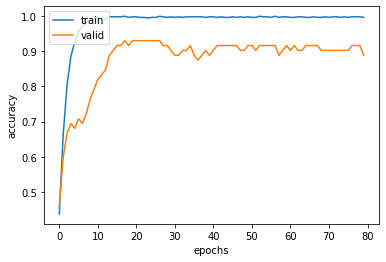

In [ ]:
plt.plot(history_dense.history['acc'], label = 'train',)
plt.plot(history_dense.history['val_acc'], label = 'valid')

plt.legend(loc = 'upper left')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [ ]:

dns_result = densenet_model.evaluate(test_generator)

10/10 [==============================] - 12s 1s/step - loss: 0.3972 - acc: 0.8730


In [ ]:
image_shape = (460,460,3)
N_CLASSES = 4
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(dtype='float32')
train_generator = train_datagen.flow_from_directory(train_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

valid_datagen = ImageDataGenerator(dtype='float32')
valid_generator = valid_datagen.flow_from_directory(valid_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

test_datagen = ImageDataGenerator(dtype='float32')
test_generator = test_datagen.flow_from_directory(test_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [ ]:
res_model = ResNet50(include_top=False, pooling='avg', weights='imagenet', input_shape = (image_shape))

# make all layers except conv5 layers not trainable
for layer in res_model.layers:
    if 'conv5' not in layer.name:
        layer.trainable = False

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
resnet_model = Sequential()
resnet_model.add(res_model)
resnet_model.add(Dropout(0.4))
resnet_model.add(Flatten())
resnet_model.add(BatchNormalization())
resnet_model.add(Dropout(0.4))
resnet_model.add(Dense(N_CLASSES, activation='softmax'))
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 4)                 8196      
                                                      

In [ ]:
optimizer = optimizers.Adam(learning_rate= 0.00001, decay= 1e-5)
resnet_model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics = ['acc'])

In [ ]:
checkpointer = ModelCheckpoint(filepath='./finalmodel-ResNet50.hdf5',
                            monitor='val_loss', verbose = 1,
                            save_best_only=True)
early_stopping = EarlyStopping(verbose=1, patience=20)

In [ ]:
history_res = resnet_model.fit(train_generator,
                            steps_per_epoch = 20,
                            epochs = 120,
                            verbose = 1,
                            validation_data = valid_generator,
                            callbacks = [checkpointer, early_stopping])

Epoch 1/120
20/20 [==============================] - ETA: 0s - loss: 1.8669 - acc: 0.3393
Epoch 1: val_loss improved from inf to 1.24645, saving model to ./finalmodel-ResNet50.hdf5
20/20 [==============================] - 22s 786ms/step - loss: 1.8669 - acc: 0.3393 - val_loss: 1.2464 - val_acc: 0.4583
Epoch 2/120
20/20 [==============================] - ETA: 0s - loss: 1.4151 - acc: 0.4992
Epoch 2: val_loss improved from 1.24645 to 1.15064, saving model to ./finalmodel-ResNet50.hdf5
20/20 [==============================] - 13s 647ms/step - loss: 1.4151 - acc: 0.4992 - val_loss: 1.1506 - val_acc: 0.4306
Epoch 3/120
20/20 [==============================] - ETA: 0s - loss: 1.1255 - acc: 0.5677
Epoch 3: val_loss improved from 1.15064 to 1.07544, saving model to ./finalmodel-ResNet50.hdf5
20/20 [==============================] - 13s 652ms/step - loss: 1.1255 - acc: 0.5677 - val_loss: 1.0754 - val_acc: 0.4722
Epoch 4/120
20/20 [==============================] - ETA: 0s - loss: 0.9696 - acc: 

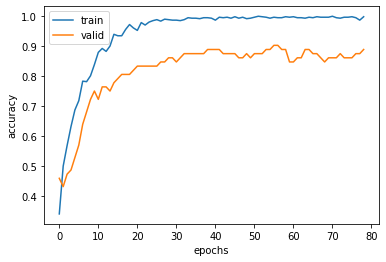

In [ ]:
plt.plot(history_res.history['acc'], label = 'train',)
plt.plot(history_res.history['val_acc'], label = 'valid')

plt.legend(loc = 'upper left')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [ ]:
result = resnet_model.evaluate(test_generator)

10/10 [==============================] - 6s 633ms/step - loss: 0.4773 - acc: 0.8413


In [ ]:
from keras.models import load_model
import tensorflow as tf
import numpy as np
from keras.models import load_model
from keras_preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import load_img
model = load_model('/content/drive/MyDrive/ml-projects/lung-cancer-detection/trainedmodel_version3.hdf5')

In [ ]:
paths = ["/content/drive/MyDrive/Data/test/adenocarcinoma", "/content/drive/MyDrive/Data/test/large.cell.carcinoma", "/content/drive/MyDrive/Data/test/normal", "/content/drive/MyDrive/Data/test/squamous.cell.carcinoma"]
results = {"adeno":{0:0, 1:0, 2:0, 3:0},
            "large":{0:0, 1:0, 2:0, 3:0},
            "normal":{0:0, 1:0, 2:0, 3:0},
            "squamous":{0:0, 1:0, 2:0, 3:0}}

for path, key in zip(paths, results.keys()):
    
    for file in os.listdir(path):
        img = load_img(
            (path +"/"+ file), target_size=(460, 460)
        )
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, 0)
        prediction = model.predict(img_array, verbose=0)
        results[key][np.argmax(prediction)] = results.get(key).get(np.argmax(prediction),0) + 1

results

{'adeno': {0: 108, 1: 12, 2: 0, 3: 0},
 'large': {0: 15, 1: 36, 2: 0, 3: 0},
 'normal': {0: 0, 1: 1, 2: 53, 3: 0},
 'squamous': {0: 34, 1: 4, 2: 0, 3: 52}}

In [ ]:
df = pd.DataFrame(results)

print("Overall accuracy is : {:.2f}%\n".format((df["adeno"][0] + df["large"][1] + df["normal"][2] + df["squamous"][3]) / 315 * 100))

print("Adeno cancer detection accuracy is : {:.2f}%".format(df["adeno"][0] / df["adeno"].sum() * 100))
print("Large cell cancer detection accuracy is : {:.2f}%".format(df["large"][1] / df["large"].sum() * 100))
print("Normal chest detection accuracy is : {:.2f}%".format(df["normal"][2] / df["normal"].sum() * 100))
print("Squamous cell cancer detection accuracy is : {:.2f}%".format(df["squamous"][3] / df["squamous"].sum() * 100))

print("\nConfusion Matrix :")
df.transpose()

Overall accuracy is : 79.05%

Adeno cancer detection accuracy is : 90.00%
Large cell cancer detection accuracy is : 70.59%
Normal chest detection accuracy is : 98.15%
Squamous cell cancer detection accuracy is : 57.78%

Confusion Matrix :


,0,1,2,3
adeno,108,12,0,0
large,15,36,0,0
normal,0,1,53,0
squamous,34,4,0,52


In [ ]:
img_path = "/content/drive/MyDrive/Data/test/large.cell.carcinoma/000108.png"

class_names=list(test_generator.class_indices.keys())

img = tf.keras.utils.load_img(img_path, target_size=(460, 460))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

prediction = model.predict(img_array)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(prediction)], 100 * np.max(prediction))
)

1/1 [==============================] - 0s 21ms/step
This image most likely belongs to adenocarcinoma with a 62.58 percent confidence.
